In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import nltk
pd.set_option("display.max_colwidth", 200)

In [26]:
%matplotlib notebook

In [27]:
#read csv file
df=pd.read_csv('papers2.csv')

In [28]:
#checking for the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 4 columns):
Unnamed         16 non-null int64
title           16 non-null object
content         16 non-null object
tidy_content    16 non-null object
dtypes: int64(1), object(3)
memory usage: 592.0+ bytes


In [29]:
#Top 5 rows of the dataframe
df.head()

,Unnamed,title,content,tidy_content
0,0,Expression a multidrug-resistance gene in human tumors\nand tissues,"identification and cloning segment \n human multidrug resistance gene (mdrl) was reported\nrecently. examine molecular basis one type \nmultidrug resistance, we have prepared RNA from human\ntum...","identification and cloning segment \n human multidrug resistance gene (mdrl) was reported\nrecently. examine molecular basis one type \nmultidrug resistance, we have prepared RNA from human\ntum..."
1,1,MULTIDRUG RESISTANCE IN\r\nCANCER: ROLE ATP-DEPENDENT\r\nTRANSPORTERS,"Chemorapeutics are most effective treatment for metastatic tumours. However, ability\n cancer cells to become simultaneously resistant to different drugs — a trait known as\nmultidrug resistance...","Chemorapeutics are most effective treatment for metastatic tumours. However, ability\r\n cancer cells to become simultaneously resistant to different drugs — a trait known as\r\nmultidrug resist..."
2,2,Targeting multidrug resistance in cancer,"Abstract | Effective treatment metastatic cancers usually requires use toxic\nchemorapy. In most cases, multiple drugs are used, as resistance to single agents occurs\nalmost universally. For t...","Abstract | Effective treatment metastatic cancers usually requires use toxic\r\nchemorapy. In most cases, multiple drugs are used, as resistance to single agents occurs\r\nalmost universally. F..."
3,3,A multidrug resistance transporter from human MCF-7 breast\r\ncancer cells,MCF-7yAdrVp is a multidrug-resistant human\nbreast cancer subline that displays an ATP-dependent\nreduction in intracellular accumulation anthracycline\nanticancer drugs in absence overexpress...,MCF-7yAdrVp is a multidrug-resistant human\r\nbreast cancer subline that displays an ATP-dependent\r\nreduction in intracellular accumulation anthracycline\r\nanticancer drugs in absence overe...
4,4,"Multidrug resistance (MDR) in cancer\nMechanisms, reversal using modulators MDR and role MDR\nmodulators in influencing pharmacokinetics anticancer drugs","recent years, re has been increased understanding P-glycoprotein (P-GP)-mediated pharmacokinetic interactions. In addition,\nits role in modifying bioavailability orally administered drugs via ...","recent years, re has been increased understanding P-glycoprotein (P-GP)-mediated pharmacokinetic interactions. In addition,\nits role in modifying bioavailability orally administered drugs via ..."


In [30]:
#Tokenizing: Split the text by spaces or in simple words.
df['tokenized_content'] = df['tidy_content'].apply(lambda x: x.split())

In [31]:
#checking cleaned tokenised text.
print((df['tokenized_content'].values)[0])

['identification', 'and', 'cloning', 'segment', 'human', 'multidrug', 'resistance', 'gene', '(mdrl)', 'was', 'reported', 'recently.', 'examine', 'molecular', 'basis', 'one', 'type', 'multidrug', 'resistance,', 'we', 'have', 'prepared', 'RNA', 'from', 'human', 'tumors', 'normal', 'tissues', 'measured', 'ir', 'content', 'mdrl', 'RNA.', 'We', 'find', 'mdrl', 'gene', 'is', 'expressed', 'at', 'a', 'very', 'high', 'level', 'in', 'adrenal', 'gland', 'a', 'high', 'level', 'kidney;', 'intermediate', 'levels', 'in', 'lung,', 'liver,', 'lower', 'jejunum,', 'colon,', 'rectum;', 'and', 'low', 'levels', 'many', 'or', 'tissues.', 'mdrl', 'gene', 'also', 'expressed', 'in', 'several', 'human', 'tumors,', 'including', 'many', 'but', 'all', 'tumors', 'derived', 'from', 'adrenal', 'gland', 'colon.', 'addition,', 'increased', 'expression', 'was', 'detected', 'in', 'a', 'few', 'tumors', 'time', 'relapse', 'following', 'initial', 'chemorapy.', 'Although', 'controlled', 'clinical', 'studies', 'will', 'be', 'r

In [32]:
#Scikit learn tfidf vectorizer for getting doc term TF-IDF score
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

#bow_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2,max_features=1000, stop_words='english')
bow_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, stop_words='english')
bow = bow_vectorizer.fit_transform(df['tidy_content'])
bow.shape

(16, 213)

In [33]:
#total number of words in the corpus.
len(bow_vectorizer.get_feature_names())

213

In [34]:
#create doc-term matrix for documents
term_doc_mat=bow_vectorizer.transform(df['tidy_content'].values)

In [35]:
#Use sklearn's SVD package
no_of_topic=5
from sklearn.decomposition import TruncatedSVD
lsa = TruncatedSVD(n_components=no_of_topic,n_iter=100)

In [36]:
#fit the term-doc matrix into the model
lsa.fit(term_doc_mat)

TruncatedSVD(algorithm='randomized', n_components=5, n_iter=100,
       random_state=None, tol=0.0)

In [37]:
#save all the corpus words in the variable terms for further use.
terms = bow_vectorizer.get_feature_names()

In [38]:

#weights for all the words for differnt topics
print(lsa.components_)

[[ 0.22376217  0.0248521   0.06849814 ...  0.05227069  0.03336503
   0.05227069]
 [-0.08636181 -0.00540139 -0.01539064 ...  0.05818233  0.01206724
   0.05818233]
 [-0.15419832  0.00971165 -0.02728965 ... -0.04656112  0.00422349
  -0.04656112]
 [-0.0447847   0.00218538 -0.05845313 ...  0.01415303 -0.02697228
   0.01415303]
 [-0.25860777 -0.01570652  0.09775689 ... -0.01337449 -0.04356169
  -0.01337449]]


<IPython.core.display.Javascript object>


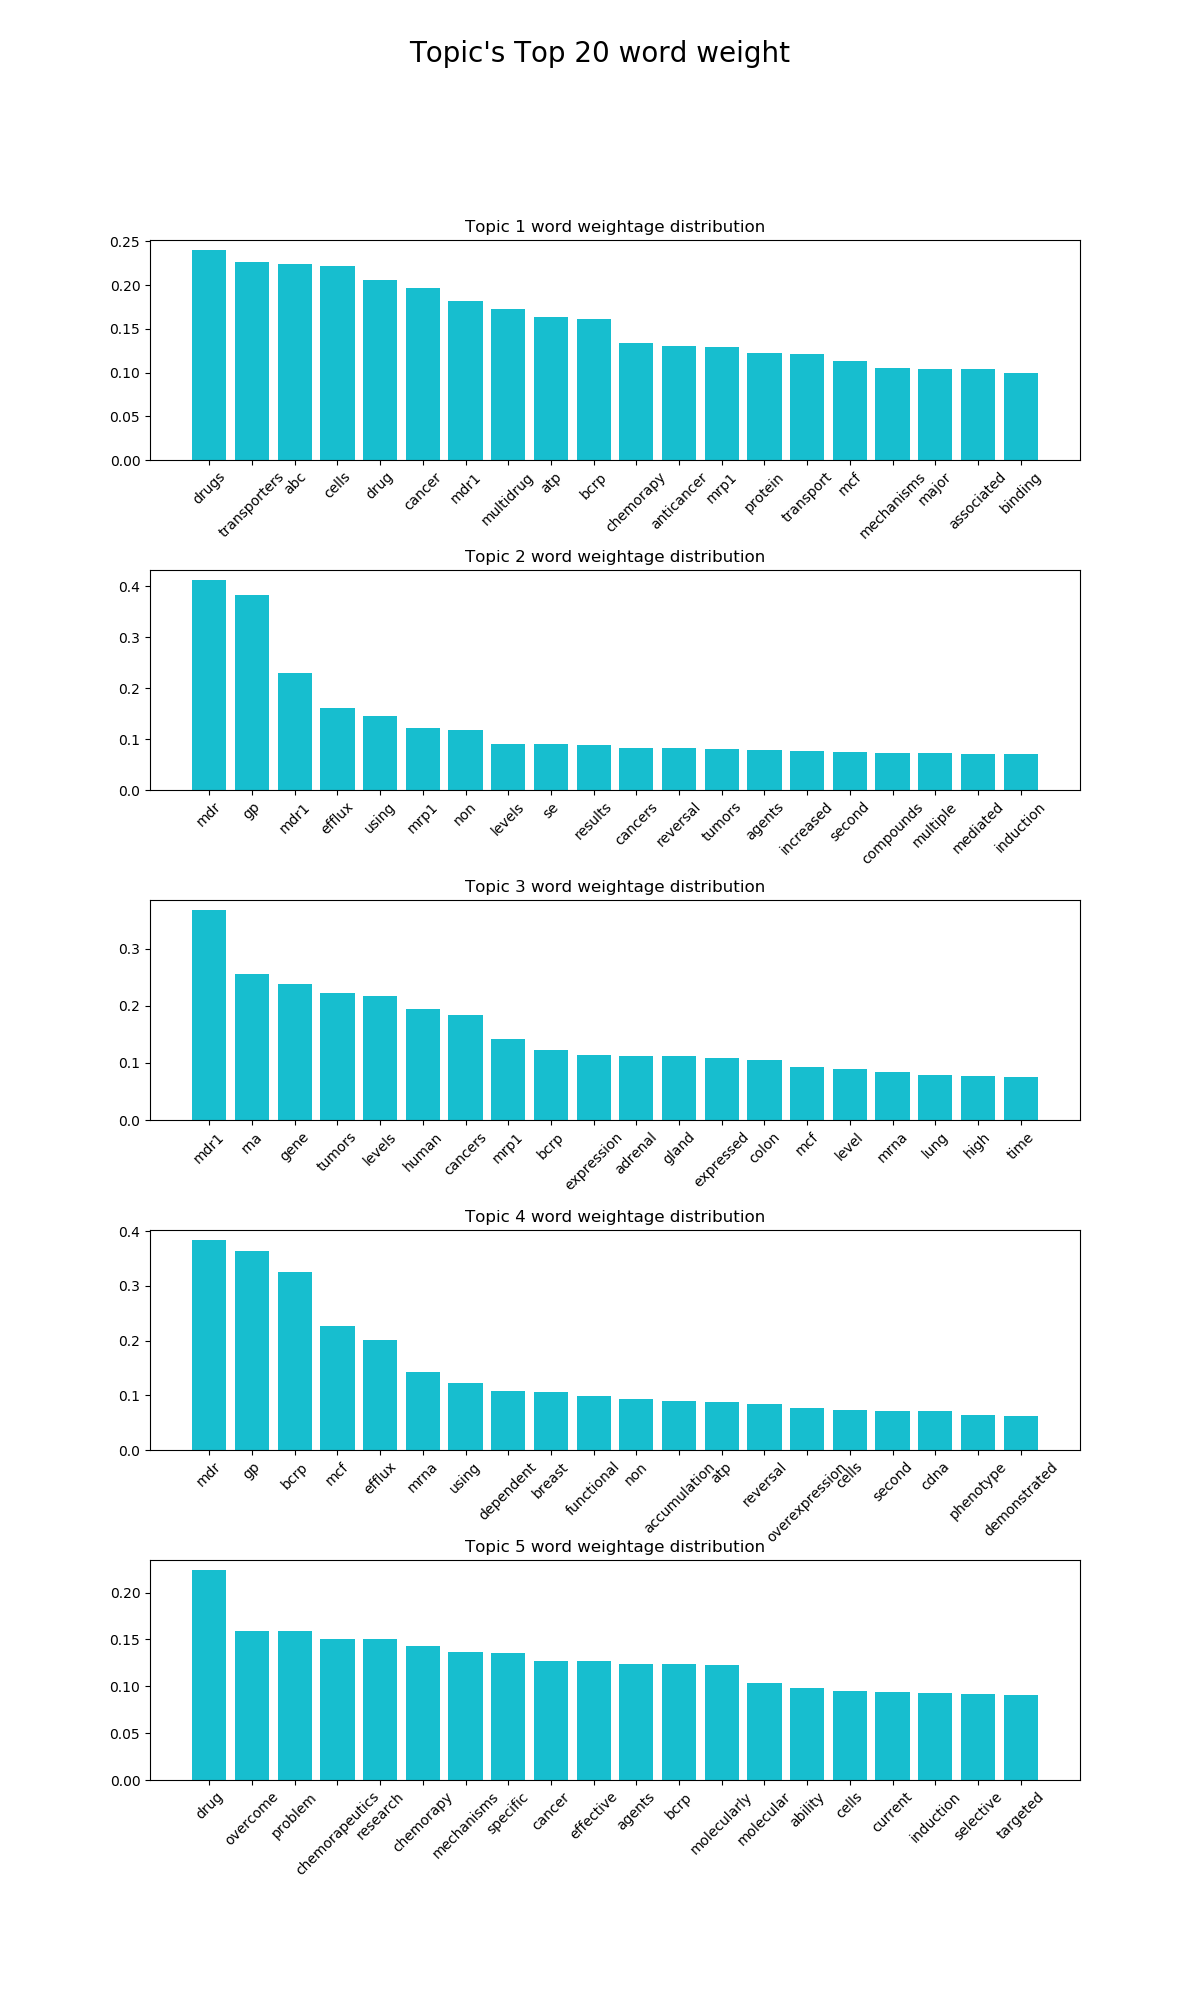

In [39]:
'''Considering the top 20 words for all the 5 topic we created using the truncated SVD.
   Displaing the top 20 words of each topic with weights.'''
topic_dic={}
f, axarr = plt.subplots(no_of_topic,1,figsize=(12, 20))
f.suptitle('Topic\'s Top 20 word weight',fontsize= 20)
plt.subplots_adjust(hspace = 0.5)
for i,comp in enumerate(lsa.components_):
    termsInComp = zip(terms,comp)
    sortedterms = sorted(termsInComp, key=lambda x: x[1],reverse=True)[:20]
    topic_dic[i]=sortedterms
    #print("Concept %d:" % i)
    word=[]
    weight=[]
    fig=[]
    
    #
    for term in sortedterms:
        word.append(term[0])
        weight.append(term[1])
        #print(term,end=',')   
        axarr[i].set_title('Topic '+str(i+1)+ ' word weightage distribution')
        axarr[i].bar(word, weight)
        axarr[i].tick_params(axis='x', labelrotation=45)
    
    print(" ")
#plt.xticks(rotation=90)
plt.show()

<IPython.core.display.Javascript object>


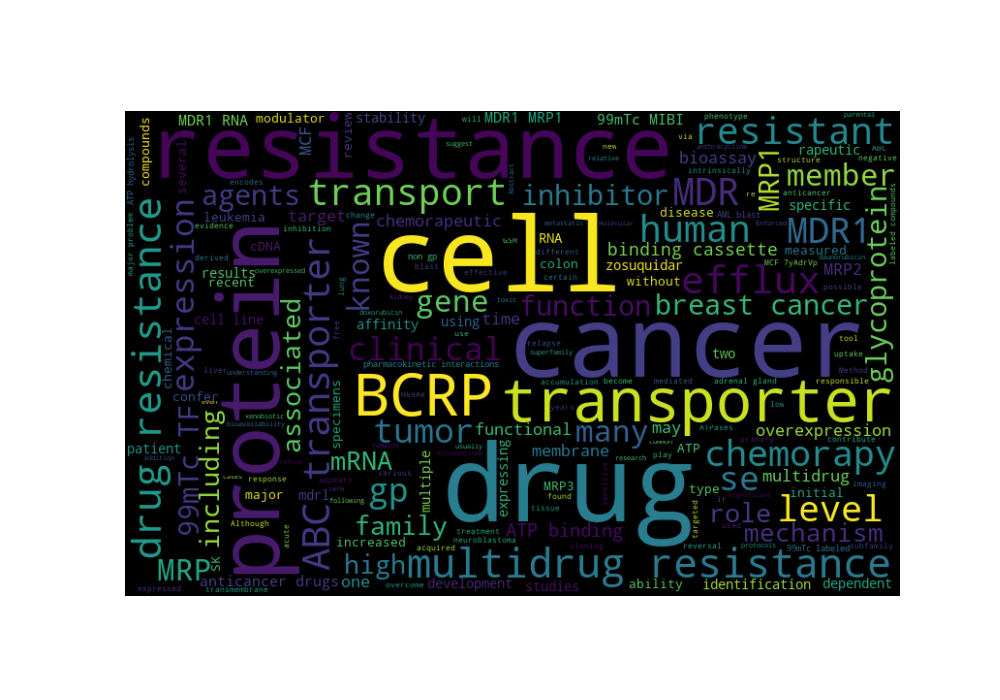

In [40]:
#show a word cloud. The bigger font means more occurance of the word.
all_words = ' '.join([text for text in df['tidy_content']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [41]:
#make list of all the words.
all_words=df.tokenized_content
all_words=sum(all_words,[])

<IPython.core.display.Javascript object>


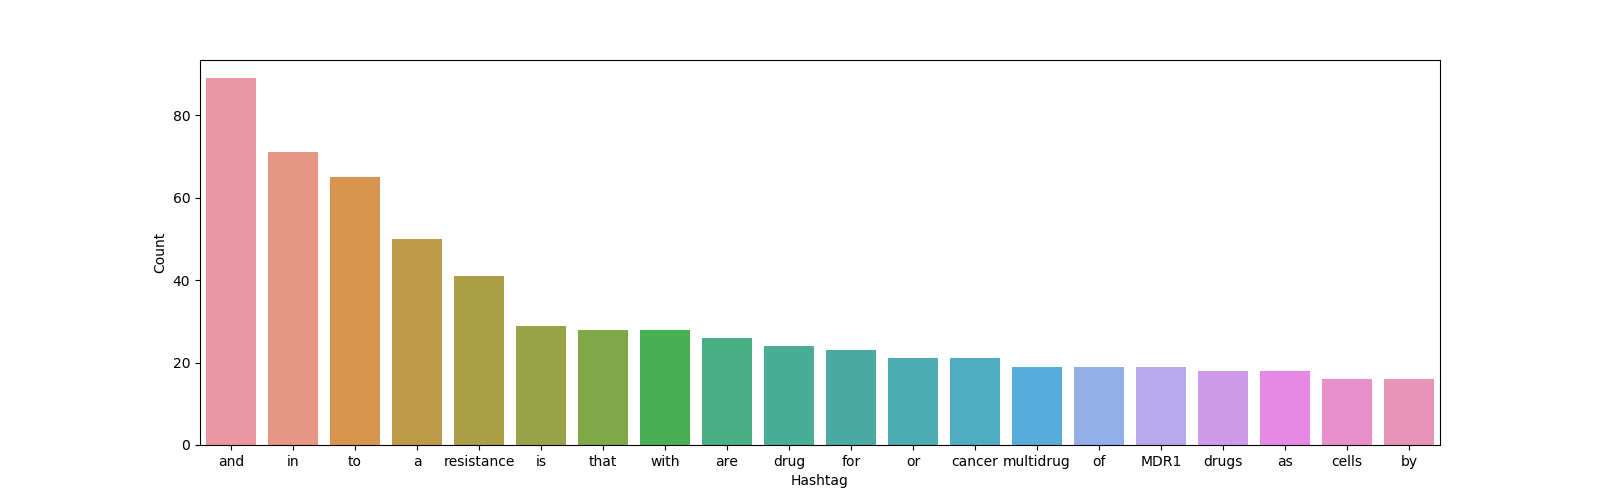

In [42]:
#plot the frequency distribution for all the words.
a = nltk.FreqDist(all_words)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# select top 20 most frequent words     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()